In [34]:
import pandas as pd

train_df0 = pd.read_csv('train.csv')
test_df0 = pd.read_csv('test.csv')

train_df = train_df0
test_df = test_df0

In [35]:
train_df.dtypes

,0
id,int64
02,int64
03,object
04,object
05,int64
06,float64
07,int64
08,float64
09,float64
10,float64


In [36]:
# Define the new column names
column_names = {
    'id': 'Customer ID',
    '02': 'Gender',
    '03': 'Date of Birth',
    '04': 'Lead Creation Date',
    '05': 'City Code',
    '06': 'Area Code',
    '07': 'Employer Code',
    '08': 'Employer Category1',
    '09': 'Employer Category2',
    '10': 'Monthly Income',
    '11': 'Bank Code',
    '12': 'Bank Account Type',
    '13': 'Marketing Source',
    '14': 'Marketing_Category1',
    '15': 'Marketing_Category2',
    '16': 'Current Loan Installment',
    '17': 'Requested Loan Amount',
    '18': 'Loan Repayment (Years)',
    '19': 'Interest Rate',
    '20': 'Requested Loan Installment',
    'class': 'Loan Approval Status'
}

# Rename columns in the train and test dataframes
train_df.rename(columns=column_names, inplace=True)
test_df.rename(columns=column_names, inplace=True)

In [62]:
test_df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13940 entries, 0 to 13939
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Customer ID                 13940 non-null  int64  
 1   Gender                      13940 non-null  int64  
 2   Date of Birth               13933 non-null  object 
 3   Lead Creation Date          13940 non-null  object 
 4   City Code                   13940 non-null  int64  
 5   Area Code                   13784 non-null  float64
 6   Employer Code               13940 non-null  int64  
 7   Employer Category1          13115 non-null  float64
 8   Employer Category2          13066 non-null  float64
 9   Monthly Income              13940 non-null  float64
 10  Bank Code                   13940 non-null  int64  
 11  Bank Account Type           12023 non-null  float64
 12  Marketing Source            13940 non-null  int64  
 13  Marketing_Category1         139

In [37]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55760 entries, 0 to 55759
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Customer ID                 55760 non-null  int64  
 1   Gender                      55760 non-null  int64  
 2   Date of Birth               55752 non-null  object 
 3   Lead Creation Date          55760 non-null  object 
 4   City Code                   55760 non-null  int64  
 5   Area Code                   55102 non-null  float64
 6   Employer Code               55760 non-null  int64  
 7   Employer Category1          52567 non-null  float64
 8   Employer Category2          52336 non-null  float64
 9   Monthly Income              55760 non-null  float64
 10  Bank Code                   55760 non-null  int64  
 11  Bank Account Type           48289 non-null  float64
 12  Marketing Source            55760 non-null  int64  
 13  Marketing_Category1         557

In [38]:
train_df.head()

,Customer ID,Gender,Date of Birth,Lead Creation Date,City Code,Area Code,Employer Code,Employer Category1,Employer Category2,Monthly Income,...,Bank Account Type,Marketing Source,Marketing_Category1,Marketing_Category2,Current Loan Installment,Requested Loan Amount,Loan Repayment (Years),Interest Rate,Requested Loan Installment,Loan Approval Status
0,-2267620335683202440,0,1992-08-19,2016-07-26,4195062457429987311,1.0,5451653042631526903,2.0,4.0,2415.0,...,2.0,5,3,4,0.00,40950.0,5.0,NaN,0.00,0
1,6983777496993703358,1,1975-03-17,2016-02-14,-6228735452334436716,3.0,8322794614403,NaN,NaN,2625.0,...,NaN,1,7,0,0.00,NaN,NaN,NaN,0.00,0
2,-9000875829172115247,1,1983-04-07,2016-07-27,4195062457429987311,1.0,7958738730440449375,2.0,4.0,6772.5,...,1.0,4,2,10,2063.04,21000.0,5.0,15.19,2063.04,0
3,4577133526371079450,0,1975-01-23,2016-08-23,630300624900511972,1.0,-5322077886952523742,1.0,3.0,7980.0,...,1.0,4,2,10,1575.00,NaN,NaN,NaN,1575.00,0
4,5683986052858780477,0,1994-06-27,2016-07-21,4195062457429987311,1.0,-974246632625402816,2.0,4.0,945.0,...,1.0,4,3,0,0.00,NaN,NaN,NaN,0.00,0


In [39]:
# Get the count of missing values in each column for the train and test datasets
missing_train = train_df.isnull().sum()
missing_test = test_df.isnull().sum()

# Filter out columns with no missing values
missing_train = missing_train[missing_train > 0]
missing_test = missing_test[missing_test > 0]

# Display the summary of missing values
print("Missing values in train_df:\n", missing_train)
print("\nMissing values in test_df:\n", missing_test)

Missing values in train_df:
 Date of Birth                     8
Area Code                       658
Employer Category1             3193
Employer Category2             3424
Bank Account Type              7471
Current Loan Installment         41
Requested Loan Amount         22131
Loan Repayment (Years)        22131
Interest Rate                 37941
Requested Loan Installment       41
dtype: int64

Missing values in test_df:
 Date of Birth                    7
Area Code                      156
Employer Category1             825
Employer Category2             874
Bank Account Type             1917
Current Loan Installment        10
Requested Loan Amount         5574
Loan Repayment (Years)        5574
Interest Rate                 9488
Requested Loan Installment      10
dtype: int64


#### Handling Missing Data

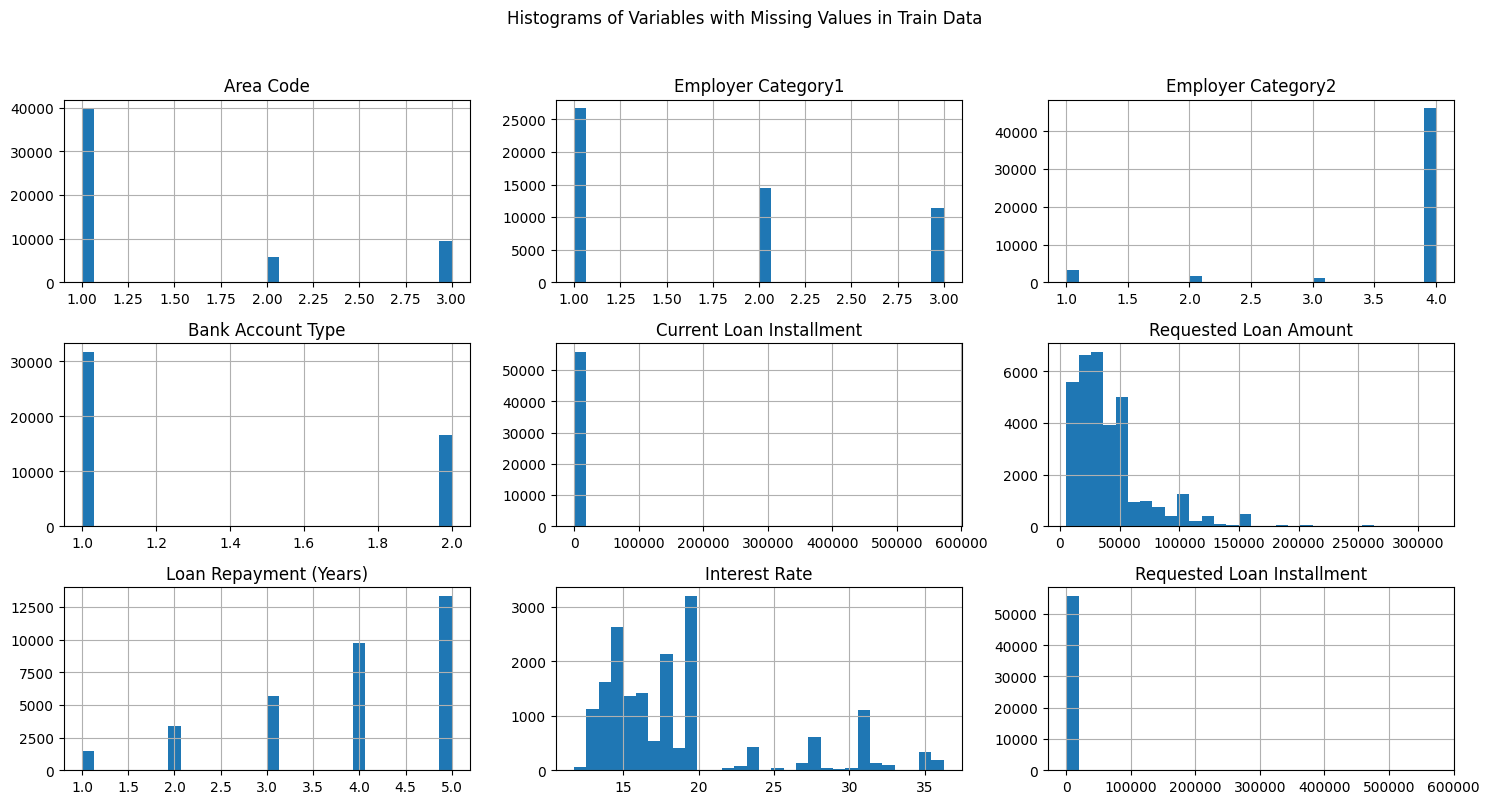

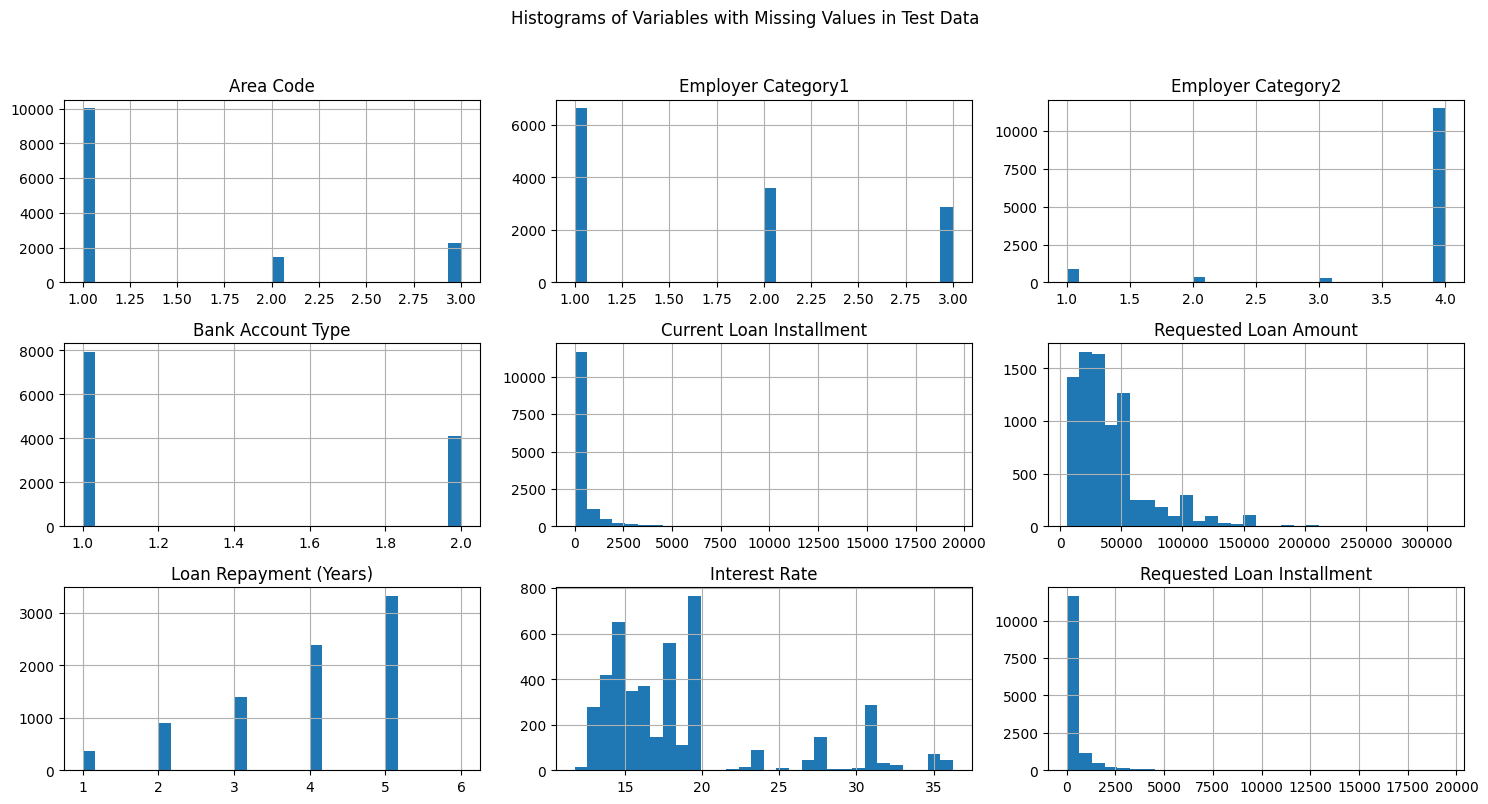

In [40]:
import matplotlib.pyplot as plt

# List of columns with missing values
columns_with_missing = ['Date of Birth', 'Area Code', 'Employer Category1', 'Employer Category2',
                        'Bank Account Type', 'Current Loan Installment', 'Requested Loan Amount',
                        'Loan Repayment (Years)', 'Interest Rate', 'Requested Loan Installment']

# Plot histograms for each column with missing values in the train_df
train_df[columns_with_missing].hist(bins=30, figsize=(15, 10), layout=(4, 3))
plt.suptitle('Histograms of Variables with Missing Values in Train Data', y=1.02)
plt.tight_layout()
plt.show()

# Plot histograms for each column with missing values in the test_df
test_df[columns_with_missing].hist(bins=30, figsize=(15, 10), layout=(4, 3))
plt.suptitle('Histograms of Variables with Missing Values in Test Data', y=1.02)
plt.tight_layout()
plt.show()


In [41]:
# List of columns to analyze
columns_to_analyze = ['Interest Rate', 'Requested Loan Amount', 'Current Loan Installment']

# Function to get distribution statistics for a column
def get_distribution_stats(df, columns):
    for col in columns:
        print(f"--- {col} ---")
        # Check if the column is numeric
        if df[col].dtype in ['int64', 'float64']:
            print(f"Count of non-missing values: {df[col].count()}")
            print(f"Mean: {df[col].mean()}")
            print(f"Median: {df[col].median()}")
            print(f"Mode: {df[col].mode()[0]}")
            print(f"Min: {df[col].min()}")
            print(f"Max: {df[col].max()}")
            print(f"25th percentile: {df[col].quantile(0.25)}")
            print(f"75th percentile: {df[col].quantile(0.75)}")
            print(f"Standard deviation: {df[col].std()}")
        else:
            # For categorical data, just show the mode and count unique values
            print(f"Count of non-missing values: {df[col].count()}")
            print(f"Mode: {df[col].mode()[0]}")
            print(f"Unique values: {df[col].nunique()}")
            print(f"Value counts:\n{df[col].value_counts().head()}")
        print("\n")

# Get distribution statistics for each column in train_df
print("Distribution statistics for train_df:\n")
get_distribution_stats(train_df, columns_to_analyze)

# Get distribution statistics for each column in test_df
print("Distribution statistics for test_df:\n")
get_distribution_stats(test_df, columns_to_analyze)


Distribution statistics for train_df:

--- Interest Rate ---
Count of non-missing values: 17819
Mean: 18.851618564453677
Median: 17.64
Mode: 19.6
Min: 11.7502
Max: 36.26
25th percentile: 14.945
75th percentile: 19.6
Standard deviation: 5.746167599968599


--- Requested Loan Amount ---
Count of non-missing values: 33629
Mean: 41437.704064943944
Median: 31500.0
Mode: 10500.0
Min: 5250.0
Max: 315000.0
25th percentile: 21000.0
75th percentile: 52500.0
Standard deviation: 32322.161372889652


--- Current Loan Installment ---
Count of non-missing values: 55719
Mean: 379.255597270231
Median: 0.0
Mode: 0.0
Min: 0.0
Max: 572708.3250000001
25th percentile: 0.0
75th percentile: 367.5
Standard deviation: 2638.527522207384


Distribution statistics for test_df:

--- Interest Rate ---
Count of non-missing values: 4452
Mean: 18.742841194968555
Median: 17.5175
Mode: 19.6
Min: 11.7502
Max: 36.26
25th percentile: 14.945
75th percentile: 19.6
Standard deviation: 5.66738876769918


--- Requested Loan Amou

Interpretation:

The Interest Rate has a relatively normal distribution, with the mode and 75th percentile close to each other. This suggests a consistent rate across both datasets.
Imputation Recommendation:

Given the normal distribution, you can use mean or median imputation. Median might be preferable if the data is slightly skewed.

Interpretation:

Requested Loan Amount shows a wide range with a large standard deviation, indicating high variability. The mode is relatively low compared to the mean and median, suggesting a right-skewed distribution.
Imputation Recommendation:

For a skewed distribution, median imputation might be better than mean. Alternatively, if you choose mean, be aware that it could be affected by outliers.

Interpretation:

Current Loan Installment has a significant number of zeros, suggesting many loans with no installment or unreported installments. The high standard deviation indicates outliers.
Imputation Recommendation:

For this column, consider imputation based on the non-zero values. If using median or mean, it might be prudent to separate zero and non-zero cases. Alternatively, a more sophisticated imputation method (e.g., KNN) might be suitable due to high variability and outliers.

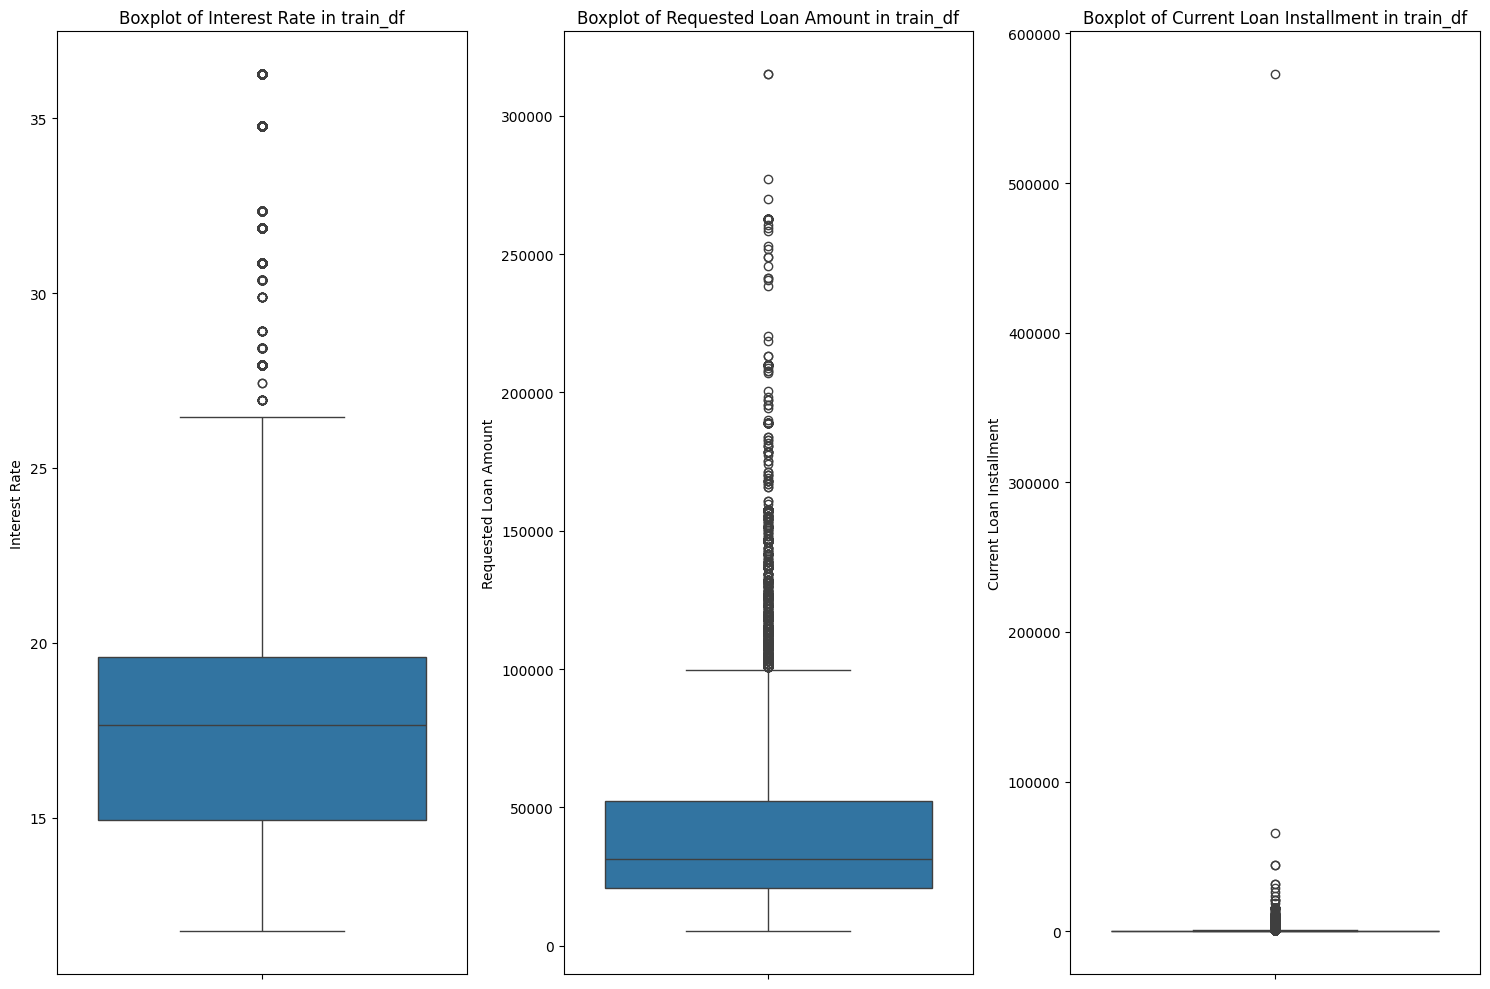

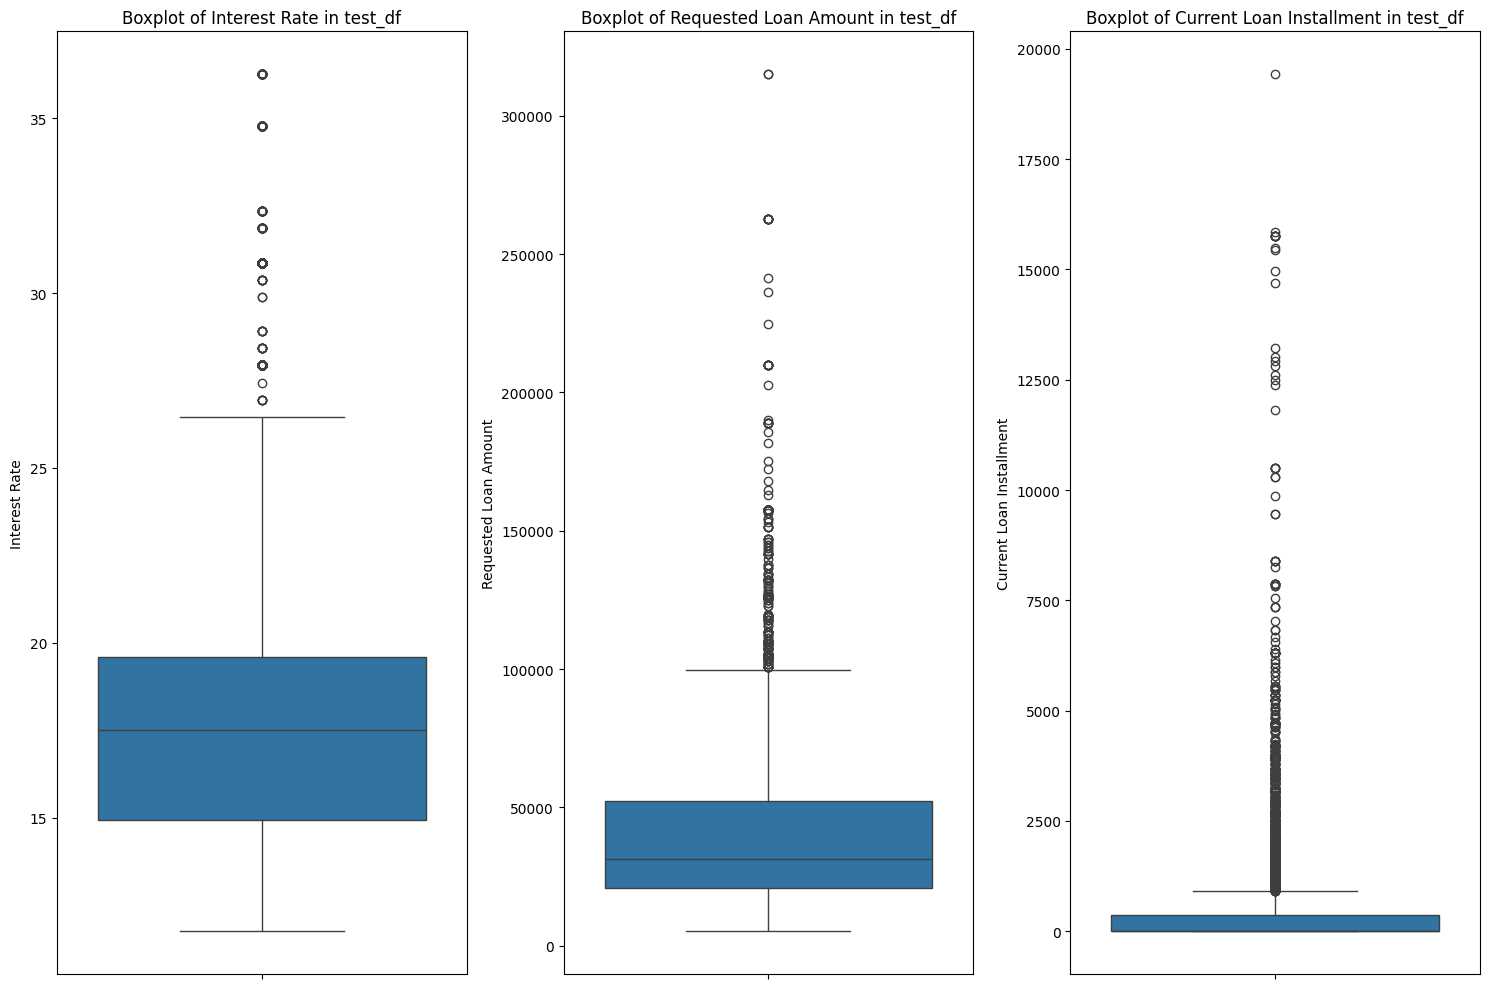

In [42]:
import seaborn as sns

# List of columns to plot
columns_to_plot = ['Interest Rate', 'Requested Loan Amount', 'Current Loan Installment']

# Plot boxplots for each column in train_df
plt.figure(figsize=(15, 10))
for i, col in enumerate(columns_to_plot, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=train_df[col])
    plt.title(f'Boxplot of {col} in train_df')
plt.tight_layout()
plt.show()

# Plot boxplots for each column in test_df
plt.figure(figsize=(15, 10))
for i, col in enumerate(columns_to_plot, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=test_df[col])
    plt.title(f'Boxplot of {col} in test_df')
plt.tight_layout()
plt.show()


1. Impute with median for all
2. Remove all missing rows
3. XGBoost and lgbm

In [53]:
from datetime import datetime

# Function to calculate age from a given date
def calculate_age(date):
    today = datetime.today()
    return today.year - date.year - ((today.month, today.day) < (date.month, date.day))

# For train_df and test_df
train_df['Age_DOB'] = pd.to_datetime(train_df['Date of Birth']).apply(calculate_age)
test_df['Age_DOB'] = pd.to_datetime(test_df['Date of Birth']).apply(calculate_age)
train_df['Age_Lead'] = pd.to_datetime(train_df['Lead Creation Date']).apply(calculate_age)
test_df['Age_Lead'] = pd.to_datetime(test_df['Lead Creation Date']).apply(calculate_age)
train_df = train_df.drop(columns=['Date of Birth', 'Lead Creation Date'])
test_df = test_df.drop(columns=['Date of Birth', 'Lead Creation Date'])

In [55]:
import pandas as pd
from sklearn.impute import SimpleImputer, KNNImputer

# --- Method 1: Impute using provided methods ---
# Copy the original DataFrames for imputation
train_imputed_df = train_df.copy()
test_imputed_df = test_df.copy()

# Impute 'Age_DOB' and 'Area Code' using mode
mode_imputer = SimpleImputer(strategy='most_frequent')
train_imputed_df[['Age_DOB', 'Area Code']] = mode_imputer.fit_transform(train_imputed_df[['Age_DOB', 'Area Code']])
test_imputed_df[['Age_DOB', 'Area Code']] = mode_imputer.transform(test_imputed_df[['Age_DOB', 'Area Code']])

# Drop 'Bank Account Type' due to high missing value percentage
train_imputed_df.drop(columns=['Bank Account Type'], inplace=True)
test_imputed_df.drop(columns=['Bank Account Type'], inplace=True)

# KNN imputer for numerical features
knn_columns = ['Current Loan Installment', 'Requested Loan Amount', 'Loan Repayment (Years)', 'Interest Rate', 'Requested Loan Installment']
knn_imputer = KNNImputer(n_neighbors=5)
train_imputed_df[knn_columns] = knn_imputer.fit_transform(train_imputed_df[knn_columns])
test_imputed_df[knn_columns] = knn_imputer.transform(test_imputed_df[knn_columns])

# Mode imputation for categorical features
train_imputed_df[['Employer Category1', 'Employer Category2']] = mode_imputer.fit_transform(train_imputed_df[['Employer Category1', 'Employer Category2']])
test_imputed_df[['Employer Category1', 'Employer Category2']] = mode_imputer.transform(test_imputed_df[['Employer Category1', 'Employer Category2']])

# --- Method 2: Remove all rows with missing values ---
train_no_missing_df = train_df.dropna()
test_no_missing_df = test_df.dropna()

# --- Method 3: Use XGBoost/LGBM which can handle missing values ---
train_original_df = train_df.copy()
test_original_df = test_df.copy()

### Modelling

In [64]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.neural_network import MLPClassifier

# Define your models
models = {
    'DecisionTree': DecisionTreeClassifier(),
    'RandomForest': RandomForestClassifier(),
    'KNN': KNeighborsClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False),
    'LGBM': lgb.LGBMClassifier(),
    'NeuralNetwork': MLPClassifier(max_iter=500)
}

def train_and_evaluate(train_df, models):
    # Split the data
    X = train_df.drop('Loan Approval Status', axis=1)
    y = train_df['Loan Approval Status']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Scale the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    results = {}
    for name, model in models.items():
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        results[name] = {
            'Classification Report': classification_report(y_test, y_pred),
            'ROC AUC Score': roc_auc_score(y_test, model.predict_proba(X_test_scaled)[:, 1])
        }
    return results

# Train and evaluate models for imputed and no_missing_df datasets
imputed_results = train_and_evaluate(train_imputed_df, models)
no_missing_results = train_and_evaluate(train_no_missing_df, models)

# Define models that can handle missing values for original datasets
models_original = {
    'XGBoost': XGBClassifier(use_label_encoder=False),
    'LGBM': lgb.LGBMClassifier()
}

# Train and evaluate models for original datasets
original_results = train_and_evaluate(train_original_df, models_original)

# Print the results
print("Imputed Results:")
for model_name, metrics in imputed_results.items():
    print(f"\n{model_name}:\n{metrics}")

print("\nNo Missing Results:")
for model_name, metrics in no_missing_results.items():
    print(f"\n{model_name}:\n{metrics}")

print("\nOriginal Results:")
for model_name, metrics in original_results.items():
    print(f"\n{model_name}:\n{metrics}")


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:12:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 683, number of negative: 43925
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002917 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2145
[LightGBM] [Info] Number of data points in the train set: 44608, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.015311 -> initscore=-4.163744
[LightGBM] [Info] Start training from score -4.163744


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:14:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 315, number of negative: 12684
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002334 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1823
[LightGBM] [Info] Number of data points in the train set: 12999, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.024233 -> initscore=-3.695524
[LightGBM] [Info] Start training from score -3.695524


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:15:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 683, number of negative: 43925
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005042 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1886
[LightGBM] [Info] Number of data points in the train set: 44608, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.015311 -> initscore=-4.163744
[LightGBM] [Info] Start training from score -4.163744
Imputed Results:

DecisionTree:
{'Classification Report': '              precision    recall  f1-score   support\n\n           0       0.99      0.98      0.98     10991\n           1       0.04      0.06      0.05       161\n\n    accuracy                           0.97     11152\n   macro avg       0.52      0.52      0.52     11152\nweighted avg       0.97      0.97      0.97     11152\n', 'ROC AUC Score': 0.5192158914888578}

RandomFore

In [69]:
from sklearn.model_selection import train_test_split

# Define the feature set and target variable for each dataset
X_imputed = train_imputed_df.drop(columns=['Loan Approval Status'])
y_imputed = train_imputed_df['Loan Approval Status']

X_no_missing = train_no_missing_df.drop(columns=['Loan Approval Status'])
y_no_missing = train_no_missing_df['Loan Approval Status']

X_original = train_original_df.drop(columns=['Loan Approval Status'])
y_original = train_original_df['Loan Approval Status']

# Split the data into training and validation sets
X_train_imputed, X_val_imputed, y_train_imputed, y_val_imputed = train_test_split(X_imputed, y_imputed, test_size=0.2, random_state=42)
X_train_no_missing, X_val_no_missing, y_train_no_missing, y_val_no_missing = train_test_split(X_no_missing, y_no_missing, test_size=0.2, random_state=42)
X_train_original, X_val_original, y_train_original, y_val_original = train_test_split(X_original, y_original, test_size=0.2, random_state=42)

In [75]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

scoring = 'roc_auc'

def grid_search_model(model, param_grid, X_train, y_train):
    grid_search = GridSearchCV(
        estimator=model,
        param_grid=param_grid,
        scoring=scoring,
        refit='roc_auc',
        cv=5,  # 5-fold cross-validation
        verbose=1,
        n_jobs=-1
    )
    grid_search.fit(X_train, y_train)
    return grid_search

# Define parameter grids
param_grids = {
    'RandomForest': {'n_estimators': [100, 200], 'max_depth': [None, 10, 20]},
    'XGBoost': {'n_estimators': [100, 200], 'max_depth': [3, 6, 9]},
    'LGBM': {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1]},
    'NeuralNetwork': {'hidden_layer_sizes': [(50,), (100,)], 'activation': ['relu', 'tanh'], 'solver': ['adam', 'sgd']}
}

# Define parameter grids for original dataset
param_grids_2 = {
    'XGBoost': {'n_estimators': [100, 200], 'max_depth': [3, 6, 9]},
    'LGBM': {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1]},
}

# Define datasets
datasets = {
    'imputed': (X_train_imputed, X_val_imputed, y_train_imputed, y_val_imputed),
    'no_missing': (X_train_no_missing, X_val_no_missing, y_train_no_missing, y_val_no_missing) }

# Apply grid search for Random Forest, XGBoost, LGBM, and Neural Network for the imputed and no_missing dataset
best_models = {dataset: {} for dataset in datasets}

for dataset_name, (X_train, X_val, y_train, y_val) in datasets.items():
    print(f"\nDataset: {dataset_name}")
    for model_name, model_class in zip(
            ['RandomForest', 'XGBoost', 'LGBM', 'NeuralNetwork'],
            [RandomForestClassifier(), XGBClassifier(), LGBMClassifier(), MLPClassifier()]
        ):
        print(f"Tuning {model_name}...")
        best_models[dataset_name][model_name] = grid_search_model(model_class, param_grids[model_name], X_train, y_train)



Dataset: imputed
Tuning RandomForest...
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Tuning XGBoost...
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Tuning LGBM...
Fitting 5 folds for each of 4 candidates, totalling 20 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 683, number of negative: 43925
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005473 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2124
[LightGBM] [Info] Number of data points in the train set: 44608, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.015311 -> initscore=-4.163744
[LightGBM] [Info] Start training from score -4.163744
Tuning NeuralNetwork...
Fitting 5 folds for each of 8 candidates, totalling 40 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
10 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py", line 753, in fit
    return self._fit(X, y, incremental=False)
  File "/usr/loc


Dataset: no_missing
Tuning RandomForest...
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Tuning XGBoost...
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Tuning LGBM...
Fitting 5 folds for each of 4 candidates, totalling 20 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 315, number of negative: 12684
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002813 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1816
[LightGBM] [Info] Number of data points in the train set: 12999, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.024233 -> initscore=-3.695524
[LightGBM] [Info] Start training from score -3.695524
Tuning NeuralNetwork...
Fitting 5 folds for each of 8 candidates, totalling 40 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
10 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py", line 753, in fit
    return self._fit(X, y, incremental=False)
  File "/usr/loc

In [74]:
# Define datasets for original dataset
datasets_2 = {
    'original': (X_train_original, X_val_original, y_train_original, y_val_original)
}

# Apply grid search for  XGBoost, LGBM for the original dataset
best_models_2 = {dataset_2: {} for dataset_2 in datasets_2}

for dataset_name_2, (X_train, X_val, y_train, y_val) in datasets_2.items():
    print(f"\nDataset: {dataset_name_2}")
    for model_name_2, model_class_2 in zip(
            ['XGBoost', 'LGBM'],
            [XGBClassifier(), LGBMClassifier()]
        ):
        print(f"Tuning {model_name_2}...")
        best_models_2[dataset_name_2][model_name_2] = grid_search_model(model_class_2, param_grids_2[model_name_2], X_train, y_train)


Dataset: original
Tuning XGBoost...
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Tuning LGBM...
Fitting 5 folds for each of 4 candidates, totalling 20 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 683, number of negative: 43925
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005858 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1874
[LightGBM] [Info] Number of data points in the train set: 44608, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.015311 -> initscore=-4.163744
[LightGBM] [Info] Start training from score -4.163744


In [78]:
# Extract and print best parameters for all datasets except 'original'
for dataset_name, models in best_models.items():
    print(f"\nBest parameters for dataset: {dataset_name}")
    for model_name, grid_search in models.items():
        best_params = grid_search.best_params_
        print(f"{model_name}: {best_params}")

# Extract and print best parameters for the original dataset
print("\nBest parameters for dataset: original")
for model_name_2, grid_search in best_models_2['original'].items():
    best_params = grid_search.best_params_
    print(f"{model_name_2}: {best_params}")



Best parameters for dataset: imputed
RandomForest: {'max_depth': 10, 'n_estimators': 200}
XGBoost: {'max_depth': 3, 'n_estimators': 100}
LGBM: {'learning_rate': 0.01, 'n_estimators': 200}
NeuralNetwork: {'activation': 'tanh', 'hidden_layer_sizes': (50,), 'solver': 'adam'}

Best parameters for dataset: no_missing
RandomForest: {'max_depth': 10, 'n_estimators': 200}
XGBoost: {'max_depth': 3, 'n_estimators': 100}
LGBM: {'learning_rate': 0.01, 'n_estimators': 200}
NeuralNetwork: {'activation': 'tanh', 'hidden_layer_sizes': (100,), 'solver': 'adam'}

Best parameters for dataset: original
XGBoost: {'max_depth': 3, 'n_estimators': 100}
LGBM: {'learning_rate': 0.01, 'n_estimators': 200}


In [79]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.neural_network import MLPClassifier

# Best parameters for each model and dataset
best_params = {
    'imputed': {
        'RandomForest': {'max_depth': 10, 'n_estimators': 200},
        'XGBoost': {'max_depth': 3, 'n_estimators': 100},
        'LGBM': {'learning_rate': 0.01, 'n_estimators': 200},
        'NeuralNetwork': {'activation': 'tanh', 'hidden_layer_sizes': (50,), 'solver': 'adam'}
    },
    'no_missing': {
        'RandomForest': {'max_depth': 10, 'n_estimators': 200},
        'XGBoost': {'max_depth': 3, 'n_estimators': 100},
        'LGBM': {'learning_rate': 0.01, 'n_estimators': 200},
        'NeuralNetwork': {'activation': 'tanh', 'hidden_layer_sizes': (100,), 'solver': 'adam'}
    },
    'original': {
        'XGBoost': {'max_depth': 3, 'n_estimators': 100},
        'LGBM': {'learning_rate': 0.01, 'n_estimators': 200}
    }
}

# Define models with best parameters
models = {
    'imputed': {
        'RandomForest': RandomForestClassifier(**best_params['imputed']['RandomForest']),
        'XGBoost': XGBClassifier(**best_params['imputed']['XGBoost']),
        'LGBM': LGBMClassifier(**best_params['imputed']['LGBM']),
        'NeuralNetwork': MLPClassifier(**best_params['imputed']['NeuralNetwork'])
    },
    'no_missing': {
        'RandomForest': RandomForestClassifier(**best_params['no_missing']['RandomForest']),
        'XGBoost': XGBClassifier(**best_params['no_missing']['XGBoost']),
        'LGBM': LGBMClassifier(**best_params['no_missing']['LGBM']),
        'NeuralNetwork': MLPClassifier(**best_params['no_missing']['NeuralNetwork'])
    },
    'original': {
        'XGBoost': XGBClassifier(**best_params['original']['XGBoost']),
        'LGBM': LGBMClassifier(**best_params['original']['LGBM'])
    }
}

# Fit the models with best parameters
fitted_models = {}

for dataset_name, model_dict in models.items():
    X_train, X_val, y_train, y_val = datasets_2.get(dataset_name, (None, None, None, None))
    if dataset_name != 'original':
        X_train, X_val, y_train, y_val = datasets.get(dataset_name, (None, None, None, None))

    for model_name, model in model_dict.items():
        if X_train is not None and y_train is not None:
            print(f"\nTraining {model_name} on dataset: {dataset_name}...")
            model.fit(X_train, y_train)
            fitted_models[(dataset_name, model_name)] = model
        else:
            print(f"Dataset {dataset_name} is not available for training {model_name}.")



Training RandomForest on dataset: imputed...

Training XGBoost on dataset: imputed...

Training LGBM on dataset: imputed...
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 683, number of negative: 43925
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015615 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2124
[LightGBM] [Info] Number of data points in the train set: 44608, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.015311 -> initscore=-4.163744
[LightGBM] [Info] Start training from score -4.163744

Training NeuralNetwork on dataset: imputed...

Training RandomForest on dataset: no_missing...

Training XGBoost on dataset: no_missing...

Training LGBM on dataset: no_missing...
[LightGBM] [Warning] Found whitespace in feature_names, re

In [81]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define models with best parameters
models_hyper = {
    'DecisionTree': DecisionTreeClassifier(),
    'RandomForest': RandomForestClassifier(max_depth=10, n_estimators=200),
    'KNN': KNeighborsClassifier(),
    'XGBoost': XGBClassifier(max_depth=3, n_estimators=100, use_label_encoder=False),
    'LGBM': lgb.LGBMClassifier(learning_rate=0.01, n_estimators=200),
    'NeuralNetwork': MLPClassifier(max_iter=500, activation='tanh', hidden_layer_sizes=(50,), solver='adam')
}

def train_and_evaluate(train_df, models):
    # Split the data
    X = train_df.drop('Loan Approval Status', axis=1)
    y = train_df['Loan Approval Status']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Scale the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    results = {}
    for name, model in models.items():
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        results[name] = {
            'Classification Report': classification_report(y_test, y_pred),
            'ROC AUC Score': roc_auc_score(y_test, model.predict_proba(X_test_scaled)[:, 1])
        }
    return results

# Train and evaluate models for imputed and no_missing_df datasets
imputed_results = train_and_evaluate(train_imputed_df, models_hyper)
no_missing_results = train_and_evaluate(train_no_missing_df, models_hyper)

# Define models that can handle missing values for original datasets
models_original = {
    'XGBoost': XGBClassifier(max_depth=3, n_estimators=100, use_label_encoder=False),
    'LGBM': lgb.LGBMClassifier(learning_rate=0.01, n_estimators=200)
}

# Train and evaluate models for original datasets
original_results = train_and_evaluate(train_original_df, models_original)

# Print the results
print("Imputed Results:")
for model_name, metrics in imputed_results.items():
    print(f"\n{model_name}:\n{metrics}")

print("\nNo Missing Results:")
for model_name, metrics in no_missing_results.items():
    print(f"\n{model_name}:\n{metrics}")

print("\nOriginal Results:")
for model_name, metrics in original_results.items():
    print(f"\n{model_name}:\n{metrics}")

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: Use

[LightGBM] [Info] Number of positive: 683, number of negative: 43925
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002857 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2145
[LightGBM] [Info] Number of data points in the train set: 44608, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.015311 -> initscore=-4.163744
[LightGBM] [Info] Start training from score -4.163744


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

[LightGBM] [Info] Number of positive: 315, number of negative: 12684
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001772 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1823
[LightGBM] [Info] Number of data points in the train set: 12999, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.024233 -> initscore=-3.695524
[LightGBM] [Info] Start training from score -3.695524


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_

[LightGBM] [Info] Number of positive: 683, number of negative: 43925
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007352 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1886
[LightGBM] [Info] Number of data points in the train set: 44608, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.015311 -> initscore=-4.163744
[LightGBM] [Info] Start training from score -4.163744
Imputed Results:

DecisionTree:
{'Classification Report': '              precision    recall  f1-score   support\n\n           0       0.99      0.98      0.98     10991\n           1       0.05      0.06      0.06       161\n\n    accuracy                           0.97     11152\n   macro avg       0.52      0.52      0.52     11152\nweighted avg       0.97      0.97      0.97     11152\n', 'ROC AUC Score': 0.5224579568489407}

RandomFore

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: Use

[LightGBM] [Info] Number of positive: 683, number of negative: 43925
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002781 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2145
[LightGBM] [Info] Number of data points in the train set: 44608, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.015311 -> initscore=-4.163744
[LightGBM] [Info] Start training from score -4.163744


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_

[LightGBM] [Info] Number of positive: 315, number of negative: 12684
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001773 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1823
[LightGBM] [Info] Number of data points in the train set: 12999, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.024233 -> initscore=-3.695524
[LightGBM] [Info] Start training from score -3.695524


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_

[LightGBM] [Info] Number of positive: 683, number of negative: 43925
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007517 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1886
[LightGBM] [Info] Number of data points in the train set: 44608, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.015311 -> initscore=-4.163744
[LightGBM] [Info] Start training from score -4.163744


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


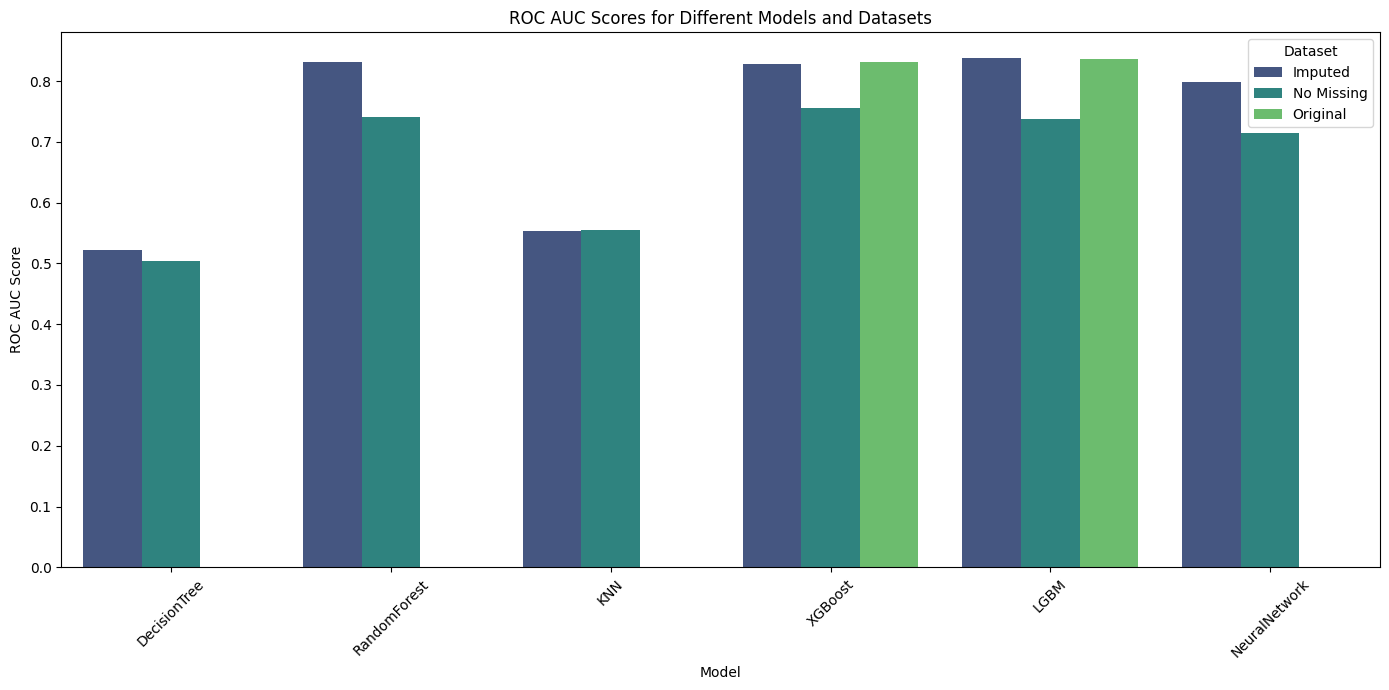

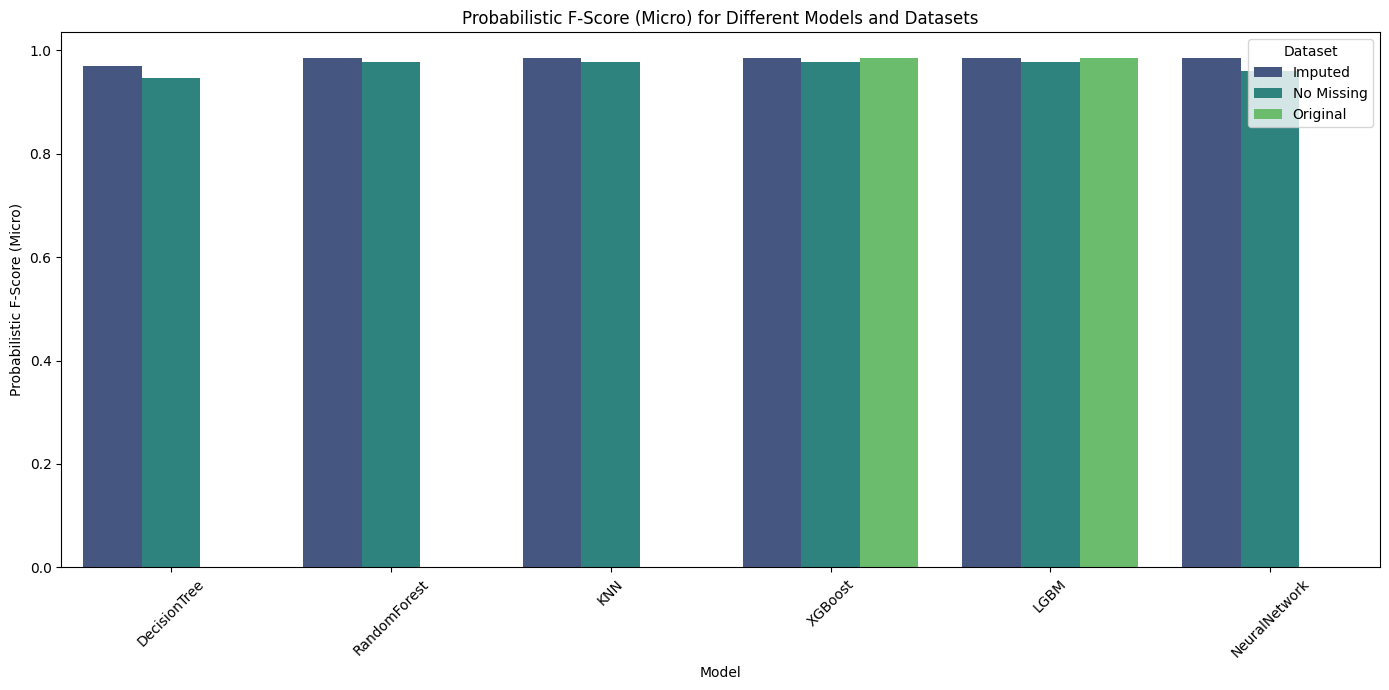

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import f1_score

# Modify train_and_evaluate to also return predictions
def train_and_evaluate(train_df, models):
    # Split the data
    X = train_df.drop('Loan Approval Status', axis=1)
    y = train_df['Loan Approval Status']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Scale the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    results = {}
    for name, model in models.items():
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
        results[name] = {
            'Classification Report': classification_report(y_test, y_pred),
            'ROC AUC Score': roc_auc_score(y_test, y_pred_proba),
            'Probabilistic F-Score (Micro)': f1_score(y_test, y_pred, average='micro'),
            'y_test': y_test,
            'y_pred': y_pred,
            'y_pred_proba': y_pred_proba
        }
    return results

# Train and evaluate models for imputed and no_missing_df datasets
imputed_results = train_and_evaluate(train_imputed_df, models_hyper)
no_missing_results = train_and_evaluate(train_no_missing_df, models_hyper)

# Define models that can handle missing values for original datasets
models_original = {
    'XGBoost': XGBClassifier(max_depth=3, n_estimators=100, use_label_encoder=False),
    'LGBM': lgb.LGBMClassifier(learning_rate=0.01, n_estimators=200)
}

# Train and evaluate models for original datasets
original_results = train_and_evaluate(train_original_df, models_original)

# Prepare results for plotting
def prepare_results_for_plotting(results, dataset_name):
    data = []
    for model_name, metrics in results.items():
        data.append({
            'Model': model_name,
            'Dataset': dataset_name,
            'ROC AUC Score': metrics['ROC AUC Score'],
            'Probabilistic F-Score (Micro)': metrics['Probabilistic F-Score (Micro)']
        })
    return pd.DataFrame(data)

# Combine results for all datasets
results_df = pd.concat([
    prepare_results_for_plotting(imputed_results, 'Imputed'),
    prepare_results_for_plotting(no_missing_results, 'No Missing'),
    prepare_results_for_plotting(original_results, 'Original')
])

# Plot ROC AUC Scores
plt.figure(figsize=(14, 7))

sns.barplot(data=results_df, x='Model', y='ROC AUC Score', hue='Dataset', palette='viridis')
plt.title('ROC AUC Scores for Different Models and Datasets')
plt.xlabel('Model')
plt.ylabel('ROC AUC Score')
plt.xticks(rotation=45)
plt.legend(title='Dataset')
plt.tight_layout()
plt.show()

# Plot Probabilistic F-Scores (Micro)
plt.figure(figsize=(14, 7))

sns.barplot(data=results_df, x='Model', y='Probabilistic F-Score (Micro)', hue='Dataset', palette='viridis')
plt.title('Probabilistic F-Score (Micro) for Different Models and Datasets')
plt.xlabel('Model')
plt.ylabel('Probabilistic F-Score (Micro)')
plt.xticks(rotation=45)
plt.legend(title='Dataset')
plt.tight_layout()
plt.show()


**Key Findings:**




1.   Data Quality: Both metrics consistently indicate that the Original dataset outperforms the Imputed and No Missing datasets, highlighting the importance of data quality for model performance.
2.   Random Forest and XGBoost Excellence: These models excel in both metrics, demonstrating their robustness and adaptability to different data conditions.
3. Model-Specific Performance: While Random Forest and XGBoost consistently perform well, the performance of Decision Tree, KNN, LGBM, and Neural Network varies across datasets and metrics.


**Conclusion:**

Based on the combined analysis of Probabilistic F-Score (Micro) and ROC AUC scores, the following conclusions can be drawn:



1.   Prioritize Data Quality: Ensure high-quality data with minimal missing values to optimize model performance.
2.   Consider Random Forest and XGBoost: These models are strong contenders for many machine learning tasks, especially when dealing with different data conditions.
3. Tailor Model Choice to Specific Needs: The optimal model choice may vary depending on the specific task, dataset characteristics, and desired performance metrics. It's essential to experiment with different models and evaluate their performance using appropriate metrics.

**Additional Considerations:**



1.   Hyperparameter Tuning: Fine-tuning the hyperparameters of each model can significantly improve performance.
2.   Feature Engineering: Creating new features or transforming existing ones can enhance model performance.
3. Ensemble Methods: Combining multiple models can often lead to improved results.
4. Domain Knowledge: Incorporating domain-specific knowledge can help guide model selection and interpretation.






